# K-Nearest Neighbors (KNN) Model

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os
from dotenv import load_dotenv

# Machine Learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             roc_curve, roc_auc_score, f1_score)
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


# Configure matplotlib for inline plotting
%matplotlib inline


In [4]:
# Load environment variables from .env file
load_dotenv()

# Get directory paths from environment variables
NOTEBOOKS_DIR_PATH = os.getenv('NOTEBOOKS_DIR_PATH')
DATASETS_DIR_PATH = os.getenv('DATASETS_DIR_PATH')
RAPORTS_DIR_PATH = os.getenv('RAPORTS_DIR_PATH')
MODELS_DIR_PATH = os.getenv('MODELS_DIR_PATH')

# Define file paths
processed_data_path = os.path.join('..', DATASETS_DIR_PATH, 'processed_data.csv')
models_dir = os.path.join('..', MODELS_DIR_PATH)


# Ensure the directory exists
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

# Load the processed data
df = pd.read_csv(processed_data_path)


## Data Preparation

We will prepare the data for modeling by separating the features and the target variable, and then splitting the data into training and testing sets.


In [5]:
# Separate features and target variable
X = df.drop('passed', axis=1)
y = df['passed']

# Split the data into training and testing sets
# We can set a random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## K-Nearest Neighbors Model Training

We will create an instance of the KNN model and train it on the training data.

### Finding the Optimal Number of Neighbors

First, we will use Grid Search with Cross-Validation to find the optimal value of `k` (number of neighbors).


In [6]:
# Define the parameter grid to search
param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

# Create a GridSearchCV object
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid.fit(X_train, y_train)

# Best parameters from Grid Search
print(f"Best parameters: {grid.best_params_}")

Best parameters: {'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'uniform'}


In [7]:
# Train the model with the best parameters
best_knn_model = grid.best_estimator_

# Evaluate the model
y_pred = best_knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy:.4f}")

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score of the model: {f1:.4f}")


Accuracy of the model: 0.5630
F1 Score of the model: 0.7174


## Model Evaluation

We will evaluate the trained model using various metrics such as accuracy, confusion matrix, classification report, and ROC curve.


In [8]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 1 49]
 [ 3 66]]


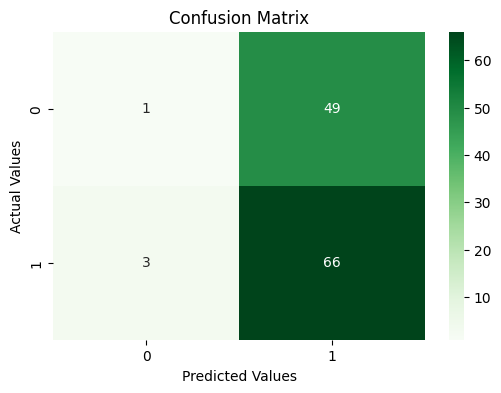

In [9]:
# Visualize the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [10]:
# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.25      0.02      0.04        50
         1.0       0.57      0.96      0.72        69

    accuracy                           0.56       119
   macro avg       0.41      0.49      0.38       119
weighted avg       0.44      0.56      0.43       119



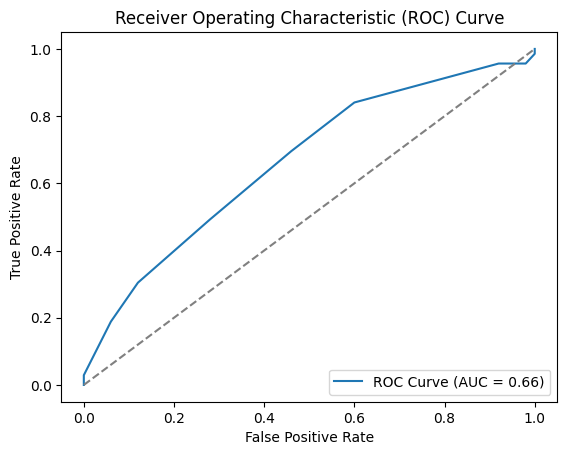

In [11]:
# ROC Curve and AUC
y_pred_proba = best_knn_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0,1],[0,1],'--', color='grey')
plt.legend(loc=4)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Save the Trained Model (Optional)

We can save the trained KNN model to a file for later use or deployment.
